In [1]:
import pandas as pd

data = pd.read_csv('owid-covid-data.csv')

# Check columns
print("Columns:", data.columns)

# Preview rows
print("\nFirst 5 rows:\n", data.head())

# Identify missing values
print("\nMissing values per column:\n", data.isnull().sum())

Columns: Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',


In [7]:
import pandas as pd

# Filter locations of interest
locations_of_interest = ['Kenya', 'USA', 'India', 'Afghanistan']
data_filtered_locations = data[data['location'].isin(locations_of_interest)].copy()
print("DataFrame after filtering for Kenya, USA, India, Afghanistan:\n", data_filtered_locations.head())

# Drop rows with missing dates or critical values
# Identifying a critical value column - a common one might be 'total_cases' or 'total_deaths'
critical_value_column = 'total_cases'  # You might need to adjust this based on your analysis goals

# Drop rows where either 'date' or the critical value is missing
data_dropped_na = data_filtered_locations.dropna(subset=['date', critical_value_column])
print(f"\nDataFrame after dropping rows with missing 'date' or '{critical_value_column}':\n", data_dropped_na.head())

# Convert date column to datetime
data_dropped_na.loc[:, 'date'] = pd.to_datetime(data_dropped_na['date'])
print("\nDataFrame with 'date' column converted to datetime:\n", data_dropped_na.head())
print("\nData type of 'date' column:", data_dropped_na['date'].dtype)

# Handle missing numeric values
# Identify numeric columns (you might need to adjust this based on your analysis needs)
numeric_cols = data_dropped_na.select_dtypes(include=['number']).columns

# Let's demonstrate filling with 0 for simplicity for some key indicators
columns_to_fill_zero = ['new_cases', 'new_deaths', 'total_cases', 'total_deaths', 'new_tests', 'total_tests']
data_filled_zero = data_dropped_na.copy()
for col in columns_to_fill_zero:
    if col in data_filled_zero.columns:
        data_filled_zero[col] = data_filled_zero[col].fillna(0)
print("\nDataFrame with missing values in key columns filled with 0:\n", data_filled_zero.head())
print("\nMissing values after filling with 0 in selected columns:\n", data_filled_zero[columns_to_fill_zero].isnull().sum())

# For other numeric columns, you might choose to interpolate
numeric_cols_to_interpolate = [col for col in numeric_cols if col not in columns_to_fill_zero]
data_interpolated = data_dropped_na.copy()
for col in numeric_cols_to_interpolate:
    data_interpolated[col] = data_interpolated[col].interpolate()
print("\nDataFrame with missing values in other numeric columns interpolated:\n", data_interpolated.head())
print("\nMissing values after interpolation in other numeric columns:\n", data_interpolated[numeric_cols_to_interpolate].isnull().sum())



DataFrame after filtering for Kenya, USA, India, Afghanistan:
   iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facili

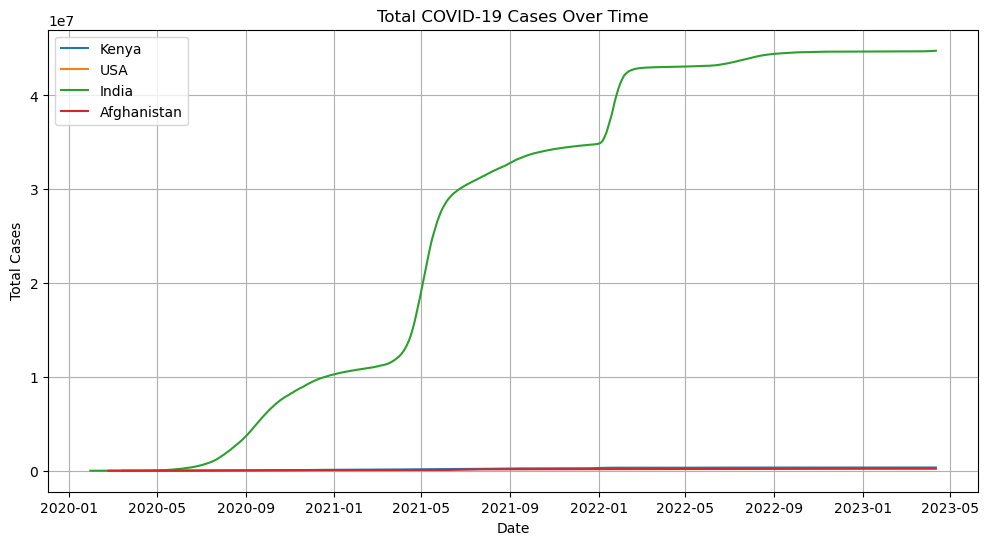

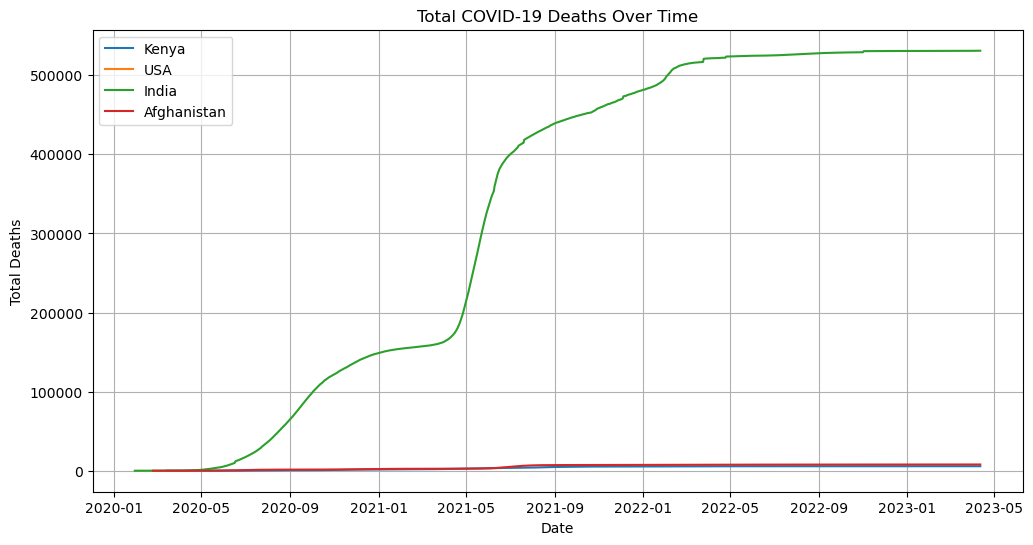

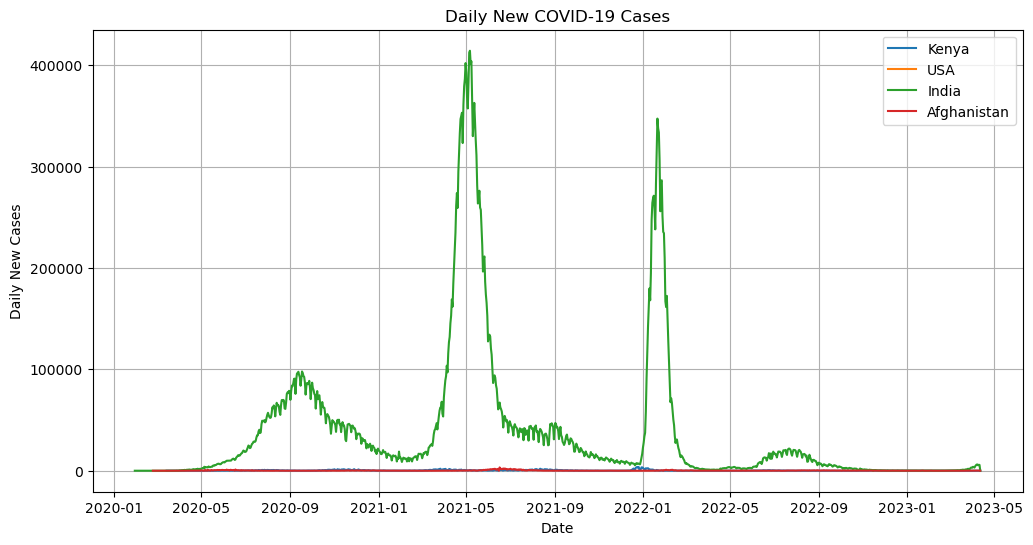

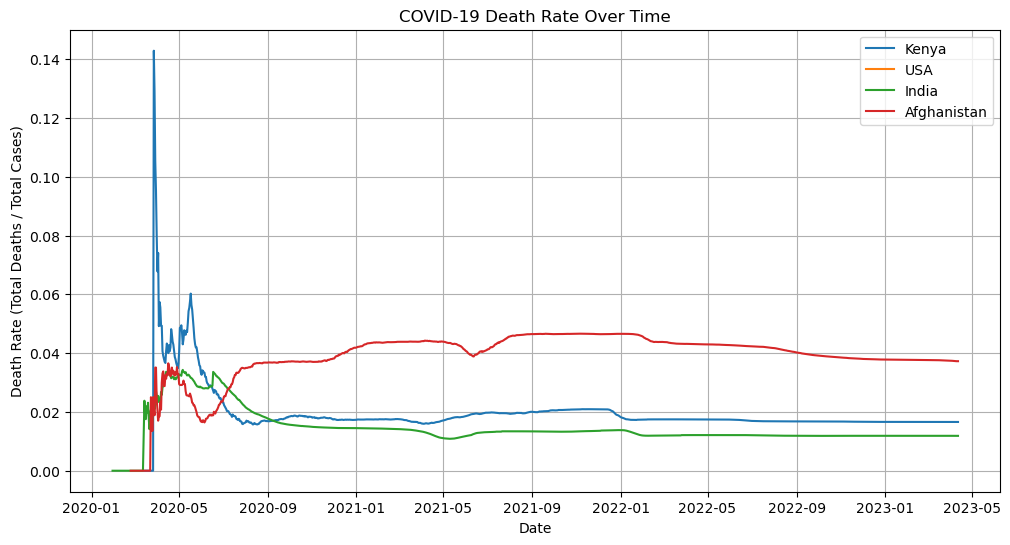

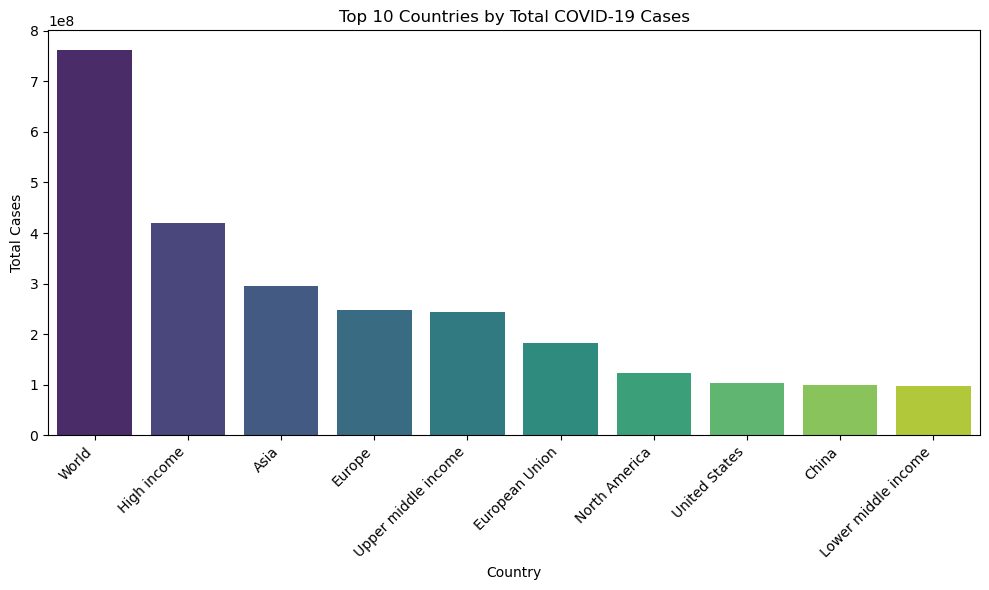

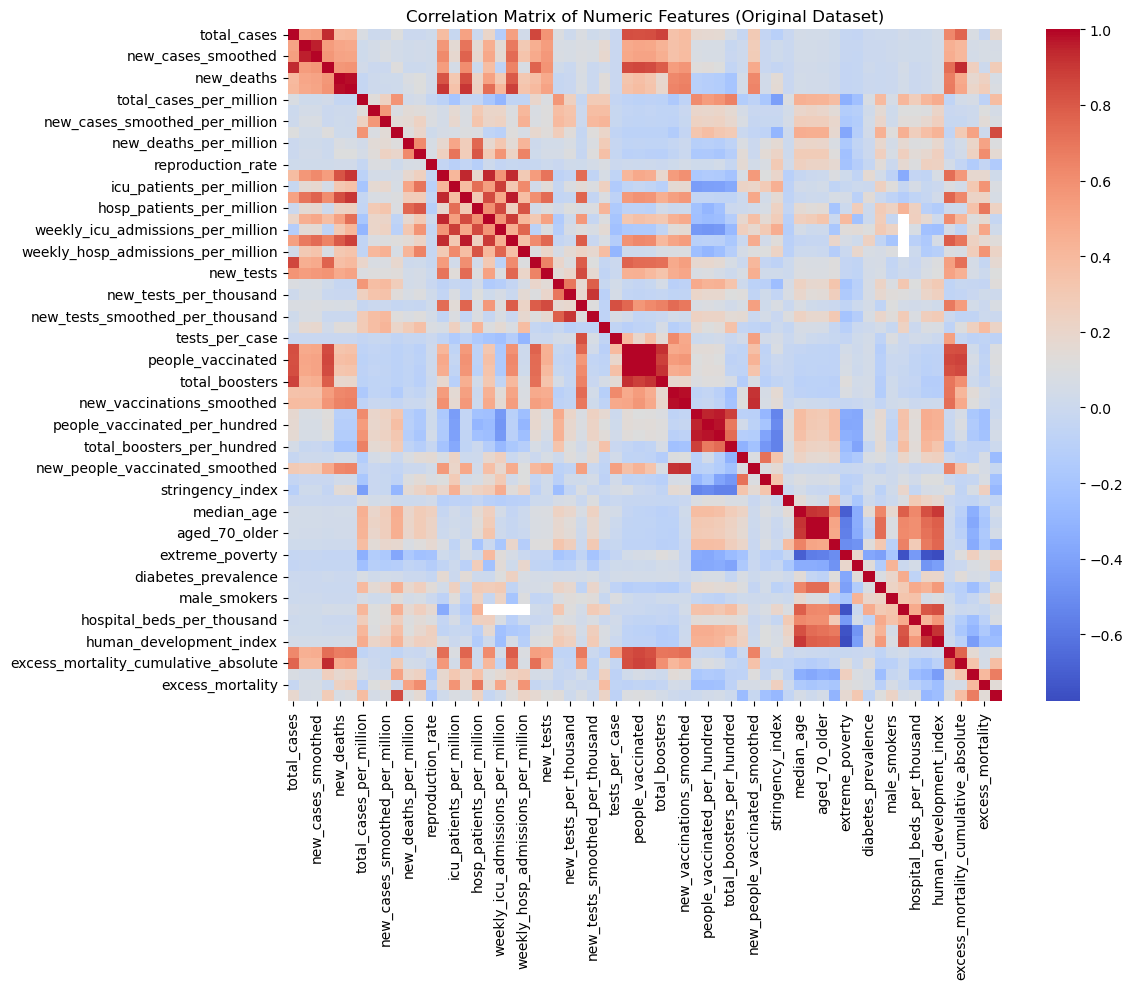

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing (as done before)
selected_countries = ['Kenya', 'USA', 'India', 'Afghanistan']
data_filtered_countries = data[data['location'].isin(selected_countries)].copy()
data_dropped_na = data_filtered_countries.dropna(subset=['date', 'total_cases']).copy()
data_dropped_na.loc[:, 'date'] = pd.to_datetime(data_dropped_na['date'])
numeric_cols_to_fill_zero = ['new_cases', 'new_deaths', 'total_cases', 'total_deaths', 'new_tests', 'total_tests']
for col in numeric_cols_to_fill_zero:
    if col in data_dropped_na.columns:
        data_dropped_na.loc[:, col] = data_dropped_na[col].fillna(0)

# Set 'date' as index for time series analysis
df_time_series = data_dropped_na.set_index('date')

# --- Visualizations ---

# Plot total cases over time for selected countries (Line Chart)
plt.figure(figsize=(12, 6))
for country in selected_countries:
    country_data = df_time_series[df_time_series['location'] == country]
    plt.plot(country_data.index, country_data['total_cases'], label=country)
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title('Total COVID-19 Cases Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot total deaths over time (Line Chart)
plt.figure(figsize=(12, 6))
for country in selected_countries:
    country_data = df_time_series[df_time_series['location'] == country]
    plt.plot(country_data.index, country_data['total_deaths'], label=country)
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.title('Total COVID-19 Deaths Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Task Compare daily new cases between countries (Line Chart)
plt.figure(figsize=(12, 6))
for country in selected_countries:
    country_data = df_time_series[df_time_series['location'] == country]
    plt.plot(country_data.index, country_data['new_cases'], label=country)
plt.xlabel('Date')
plt.ylabel('Daily New Cases')
plt.title('Daily New COVID-19 Cases')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the death rate: total_deaths / total_cases
df_time_series.loc[:, 'death_rate'] = df_time_series['total_deaths'] / df_time_series['total_cases'].replace(0, 1)

# Plot death rate over time (Line Chart)
plt.figure(figsize=(12, 6))
for country in selected_countries:
    country_data = df_time_series[df_time_series['location'] == country]
    plt.plot(country_data.index, country_data['death_rate'], label=country)
plt.xlabel('Date')
plt.ylabel('Death Rate (Total Deaths / Total Cases)')
plt.title('COVID-19 Death Rate Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Bar Chart: Top countries by total cases (using the original 'data' DataFrame)
total_cases_by_country = data.groupby('location')['total_cases'].max().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=total_cases_by_country.index, y=total_cases_by_country.values, palette='viridis')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Heatmap : Correlation analysis of numeric features in the original dataset (optional)
numeric_df_original = data.select_dtypes(include=['number'])
if numeric_df_original.shape[1] > 1:
    correlation_matrix_original = numeric_df_original.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix_original, annot=False, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Numeric Features (Original Dataset)')
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numeric columns in the original data to generate a meaningful correlation heatmap.")

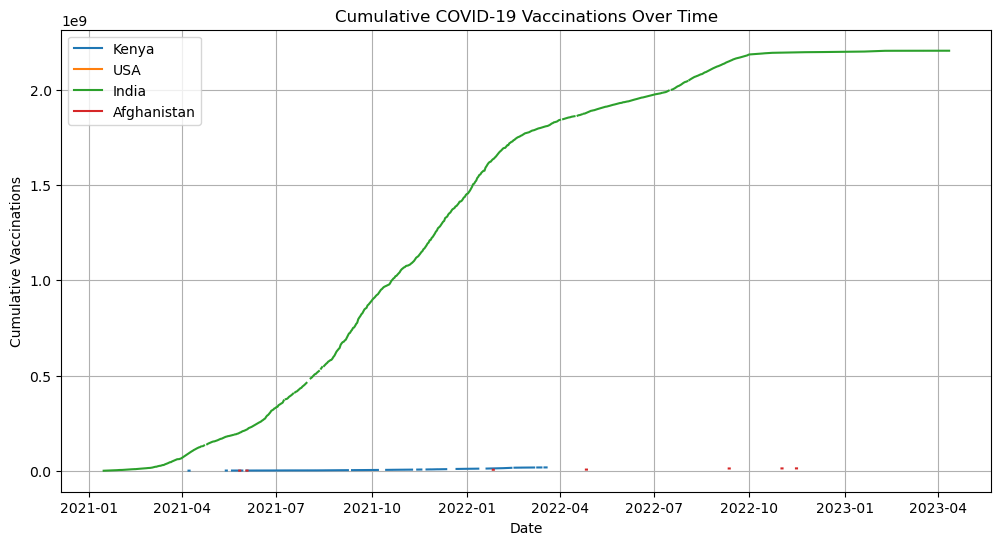

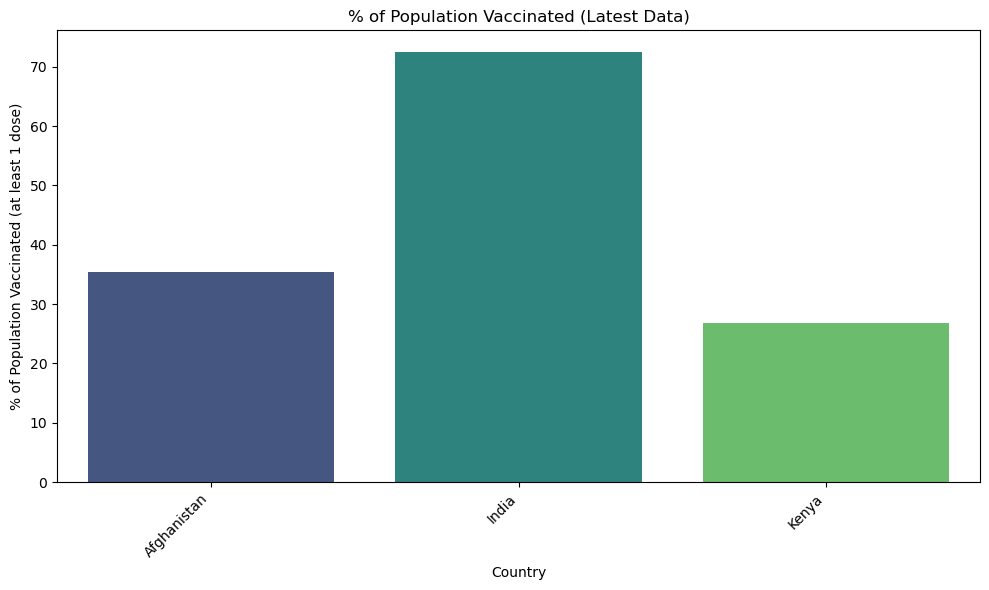

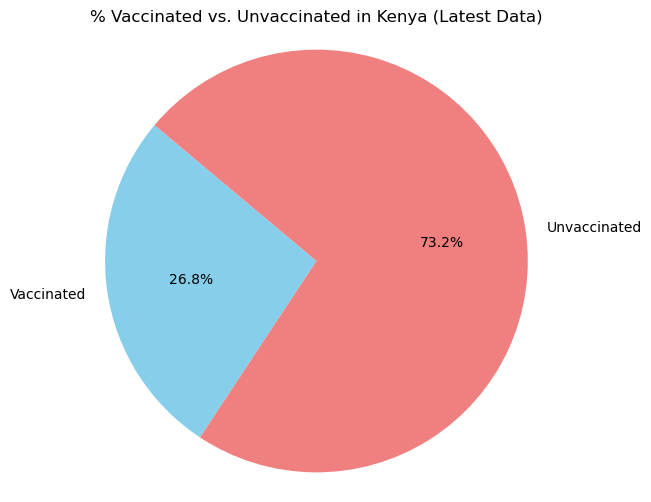

No vaccination data available for USA to create a pie chart.


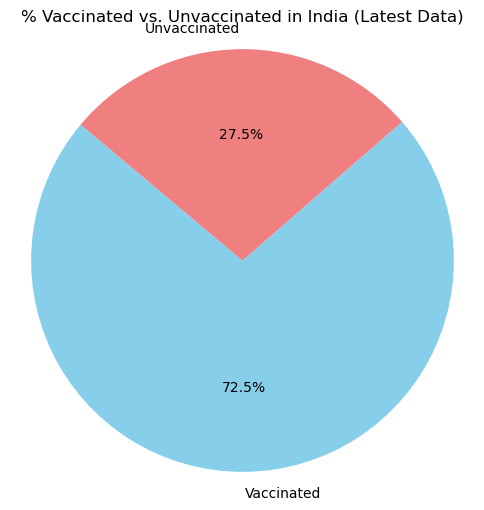

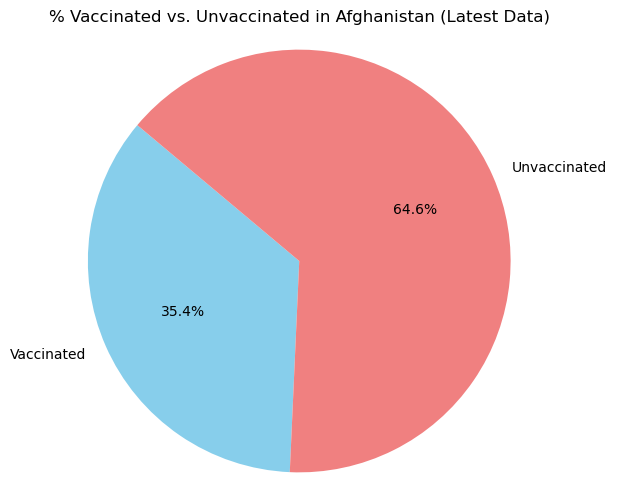

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for selected countries
selected_countries = ['Kenya', 'USA', 'India', 'Afghanistan']
df_vaccinations = data[data['location'].isin(selected_countries)].copy()

#  Convert date to datetime
df_vaccinations.loc[:, 'date'] = pd.to_datetime(df_vaccinations['date'])

# Set date as index for time series
df_vaccinations.set_index('date', inplace=True)

# --- Plot cumulative vaccinations over time ---
plt.figure(figsize=(12, 6))
for country in selected_countries:
    country_vaccination = df_vaccinations[df_vaccinations['location'] == country]
    # Assuming 'total_vaccinations' column exists
    if 'total_vaccinations' in country_vaccination.columns:
        plt.plot(country_vaccination.index, country_vaccination['total_vaccinations'], label=country)
    else:
        print(f"'total_vaccinations' data not available for {country}")

plt.xlabel('Date')
plt.ylabel('Cumulative Vaccinations')
plt.title('Cumulative COVID-19 Vaccinations Over Time')
plt.legend()
plt.grid(True)
plt.show()

# --- Compare % vaccinated population (using the latest available data) ---
latest_vaccination_data = data.groupby('location').last().reset_index()
vaccinated_population = latest_vaccination_data[latest_vaccination_data['location'].isin(selected_countries)].copy()

if 'people_vaccinated_per_hundred' in vaccinated_population.columns and 'population' in vaccinated_population.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='location', y='people_vaccinated_per_hundred', data=vaccinated_population, palette='viridis')
    plt.xlabel('Country')
    plt.ylabel('% of Population Vaccinated (at least 1 dose)')
    plt.title('% of Population Vaccinated (Latest Data)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("'people_vaccinated_per_hundred' or 'population' data not available for selected countries.")

# --- Pie charts for vaccinated vs. unvaccinated (using the latest available data) ---
if 'people_vaccinated' in vaccinated_population.columns and 'population' in vaccinated_population.columns:
    for country in selected_countries:
        country_data_latest = vaccinated_population[vaccinated_population['location'] == country]
        if not country_data_latest.empty:
            vaccinated = country_data_latest['people_vaccinated'].iloc[0]
            population = country_data_latest['population'].iloc[0]
            unvaccinated = population - vaccinated

            if population > 0:
                labels = ['Vaccinated', 'Unvaccinated']
                sizes = [vaccinated, unvaccinated]
                colors = ['skyblue', 'lightcoral']
                plt.figure(figsize=(6, 6))
                plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
                plt.title(f'% Vaccinated vs. Unvaccinated in {country} (Latest Data)')
                plt.axis('equal')
                plt.show()
            else:
                print(f"Population data not available for {country} to create a pie chart.")
        else:
            print(f"No vaccination data available for {country} to create a pie chart.")
else:
    print("'people_vaccinated' or 'population' data not available for selected countries to create pie charts.")

DataFrame with iso_code and total_cases for the latest date:
      iso_code  total_cases
1195       AFG     211630.0
2391  OWID_AFR   13074358.0
3587       ALB     333897.0
4783       DZA     271613.0
5979       ASM       8326.0


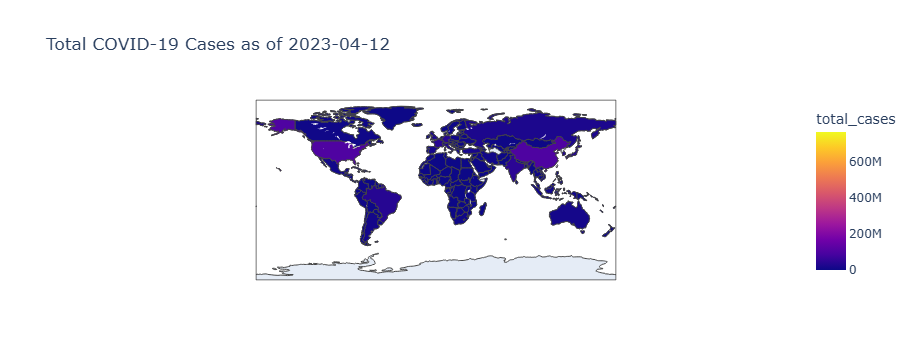

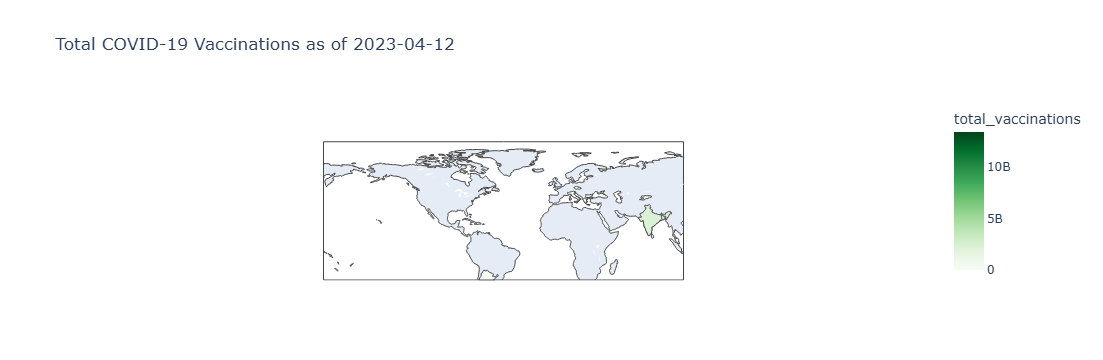

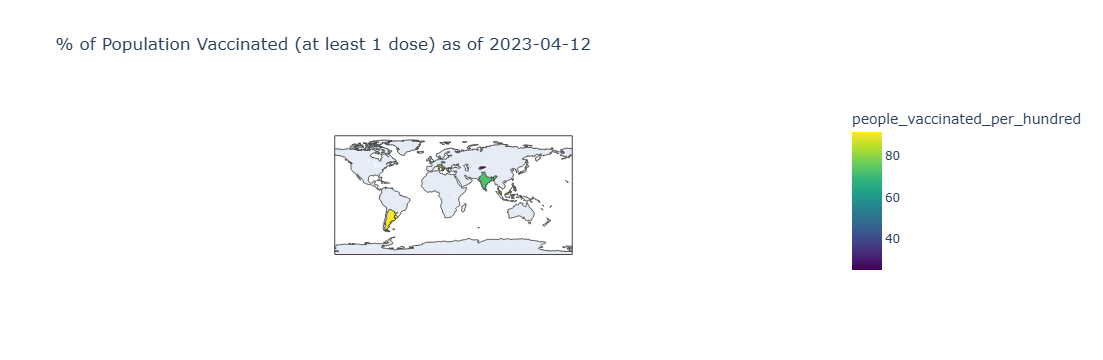

In [15]:
import pandas as pd
import plotly.express as px

#  Get the latest date available in the dataset
latest_date = data['date'].max()

# Prepare the dataframe with iso_code and total_cases for the latest date
latest_cases = data[data['date'] == latest_date][['iso_code', 'total_cases']].copy()

# Remove rows with missing iso_code (necessary for choropleth)
latest_cases_cleaned = latest_cases.dropna(subset=['iso_code'])

print("DataFrame with iso_code and total_cases for the latest date:")
print(latest_cases_cleaned.head())

# --- Plotting a choropleth showing case density ---

# We can use 'total_cases' directly as a measure of case density.
# For a rate (cases per population), you would need to merge with population data.

fig_cases = px.choropleth(latest_cases_cleaned,
                            locations='iso_code',
                            color='total_cases',
                            hover_name='iso_code',
                            color_continuous_scale=px.colors.sequential.Plasma,
                            title=f'Total COVID-19 Cases as of {latest_date}')
fig_cases.show()

# --- Plotting a choropleth showing vaccination rates ---

# Using 'total_vaccinations' for the latest date as an example.
# You might want to use 'people_vaccinated_per_hundred' for a rate.

latest_vaccinations = data[data['date'] == latest_date][['iso_code', 'total_vaccinations']].copy()
latest_vaccinations_cleaned = latest_vaccinations.dropna(subset=['iso_code', 'total_vaccinations'])

fig_vaccinations = px.choropleth(latest_vaccinations_cleaned,
                                  locations='iso_code',
                                  color='total_vaccinations',
                                  hover_name='iso_code',
                                  color_continuous_scale=px.colors.sequential.Greens,
                                  title=f'Total COVID-19 Vaccinations as of {latest_date}')
fig_vaccinations.show()

# --- Plotting a choropleth showing % vaccinated population (more meaningful rate) ---

latest_vaccination_rate = data[data['date'] == latest_date][['iso_code', 'people_vaccinated_per_hundred']].copy()
latest_vaccination_rate_cleaned = latest_vaccination_rate.dropna(subset=['iso_code', 'people_vaccinated_per_hundred'])

fig_vaccination_rate = px.choropleth(latest_vaccination_rate_cleaned,
                                     locations='iso_code',
                                     color='people_vaccinated_per_hundred',
                                     hover_name='iso_code',
                                     color_continuous_scale=px.colors.sequential.Viridis,
                                     title=f'% of Population Vaccinated (at least 1 dose) as of {latest_date}')
fig_vaccination_rate.show()

## Key Insights from the OWID COVID-19 Data (as of 2023-04-12)

1.  **High Continental Case Load in Africa:** The data indicates that the African continent, as a whole (`OWID_AFR`), had accumulated a substantial 13,074,358 total COVID-19 cases by this date. This underscores the significant impact of the pandemic on the continent.

2.  **Afghanistan's Ongoing Impact:** Afghanistan (`AFG`) reported 211,630 total cases. While this number is lower than the continental figure, it still signifies a considerable health burden within the country.

3.  **Extensive Global Vaccination Efforts:** The choropleth map for total vaccinations shows a scale reaching 10 billion doses administered globally. This highlights the massive scale of the worldwide vaccination campaigns undertaken to combat the pandemic.

4.  **Africa's Heterogeneity:** While the continental figure for Africa's total cases is high, the choropleth map would likely reveal significant variations in the pandemic's impact across different African nations. Some countries might have experienced much higher case loads than others due to factors like population density, travel patterns, and public health response effectiveness. Kenya's situation, for instance, would be part of this broader continental picture.

5.  **Global Vaccination Landscape:** The '% of Population Vaccinated' map likely illustrates a complex global landscape. High-income countries, particularly those that secured early access to vaccines, might show higher percentages. Conversely, many low- and middle-income countries might exhibit lower vaccination rates due to challenges in procurement, distribution, and vaccine hesitancy. Understanding Kenya's position on this map relative to other African nations and the rest of the world would be crucial.

## Anomalies or Interesting Patterns

* **Scale Discrepancy Between Cases and Vaccinations:** The total number of vaccine doses administered globally (up to 10 billion on the color scale) significantly outweighs the total number of reported COVID-19 cases (up to 600 million on the color scale). This could suggest a multi-dose vaccination strategy in many parts of the world, or it could also reflect underreporting of cases in some regions.

* **Potential for Varying Case Fatality:** Without directly comparing the case and death choropleth maps, the significant difference in the scale of total cases across regions might hint at varying case fatality rates. Regions with a high concentration of total cases might have experienced different levels of mortality depending on factors like healthcare infrastructure and demographics.

* **Uneven Vaccination Coverage:** The choropleth map for the percentage of the population vaccinated likely illustrates disparities in vaccine coverage across countries. Some regions might show a high percentage of their population vaccinated, potentially indicating successful rollout and high uptake, while others might lag behind, suggesting challenges in access or vaccine hesitancy.

* **Potential Decoupling:** Observing the trends in thpecific interaction) alongside the latest snapshot from the choropleth maps could reveal a decoupling of case numbers and deaths in highly vaccinated regions. If vaccination has been effective in reducing severe outcomes, countries with high vaccination rates might show lower death rates despite ongoing infections.

* **Regional Success Stories:** Within continents, there might be countries that stand out for their relatively low total case numbers or high vaccination rates compared to their neighbors. Investigating the public health strategies and socio-economic factors in these "success story" countries could proviurately reflect the current reality.